In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

rcParams['text.color'] = '#c7d5cc'  # set the default text color

# get event dataframe for game 7478
parser = Sbopen()
df, related, freeze, tactics = parser.event(3869321)

In [3]:
mask_messi = (df.type_name == 'Pass') & (df.player_id == 5503)

In [4]:
df_pass = df.loc[mask_messi, ['x', 'y', 'end_x', 'end_y', 'outcome_name', 'id', 'body_part_name']]
mask_complete = df_pass.outcome_name.isnull()

In [5]:
df_pass.head()

,x,y,end_x,end_y,outcome_name,id,body_part_name
114,49.8,55.1,44.1,46.7,NaN,29d22ca5-2dcb-4fdf-a792-1f363f6a7bed,Right Foot
148,71.0,74.3,57.4,72.5,NaN,09a4a47f-63b8-409d-99e6-92df2370e322,Left Foot
215,87.0,60.1,109.6,61.3,NaN,864ed743-6bf5-4041-92c5-51b357a29a78,Left Foot
308,93.5,61.0,98.7,60.6,NaN,71aa1f78-e7c6-4d74-aeeb-8d5dc44de68f,NaN
421,39.1,50.0,52.8,74.5,NaN,34a3dc12-a229-4672-a064-8c876eec9f96,Left Foot


Text(0.5, 0.98, "Messi's passes vs Netherlands")

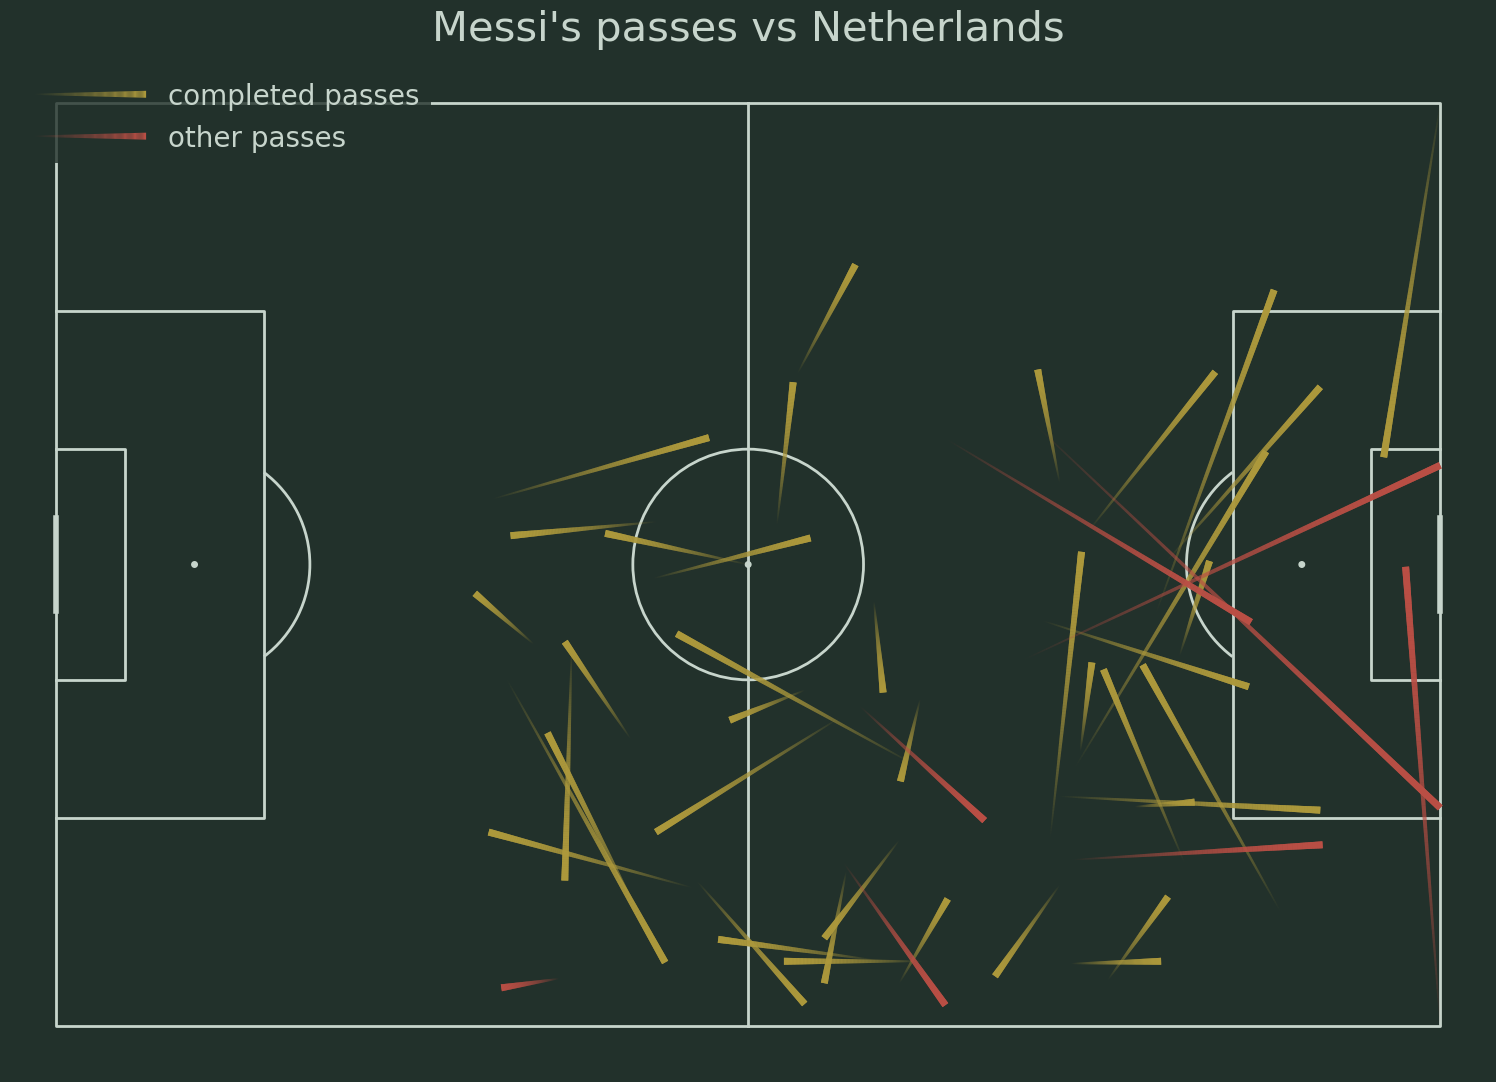

In [6]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the completed passes
lc1 = pitch.lines(df_pass[mask_complete].x, df_pass[mask_complete].y,
                  df_pass[mask_complete].end_x, df_pass[mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed passes',
                  color='#ad993c', ax=ax)

# Plot the other passes
lc2 = pitch.lines(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
                  df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='other passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's passes vs Netherlands", fontsize = 30)

In [7]:
df_pass = df.loc[(df.pass_assisted_shot_id.notnull()) & (df.player_id == 5503),
                 ['x', 'y', 'end_x', 'end_y', 'pass_assisted_shot_id', 'id', 'body_part_name']]

df_shot = (df.loc[(df.type_name == 'Shot') & (df.team_name == 'Argentina'),
                  ['id', 'outcome_name', 'shot_statsbomb_xg']]
           .rename({'id': 'pass_assisted_shot_id'}, axis=1))

df_pass = df_pass.merge(df_shot, how='left').drop('pass_assisted_shot_id', axis=1)

mask_goal = df_pass.outcome_name == 'Goal'

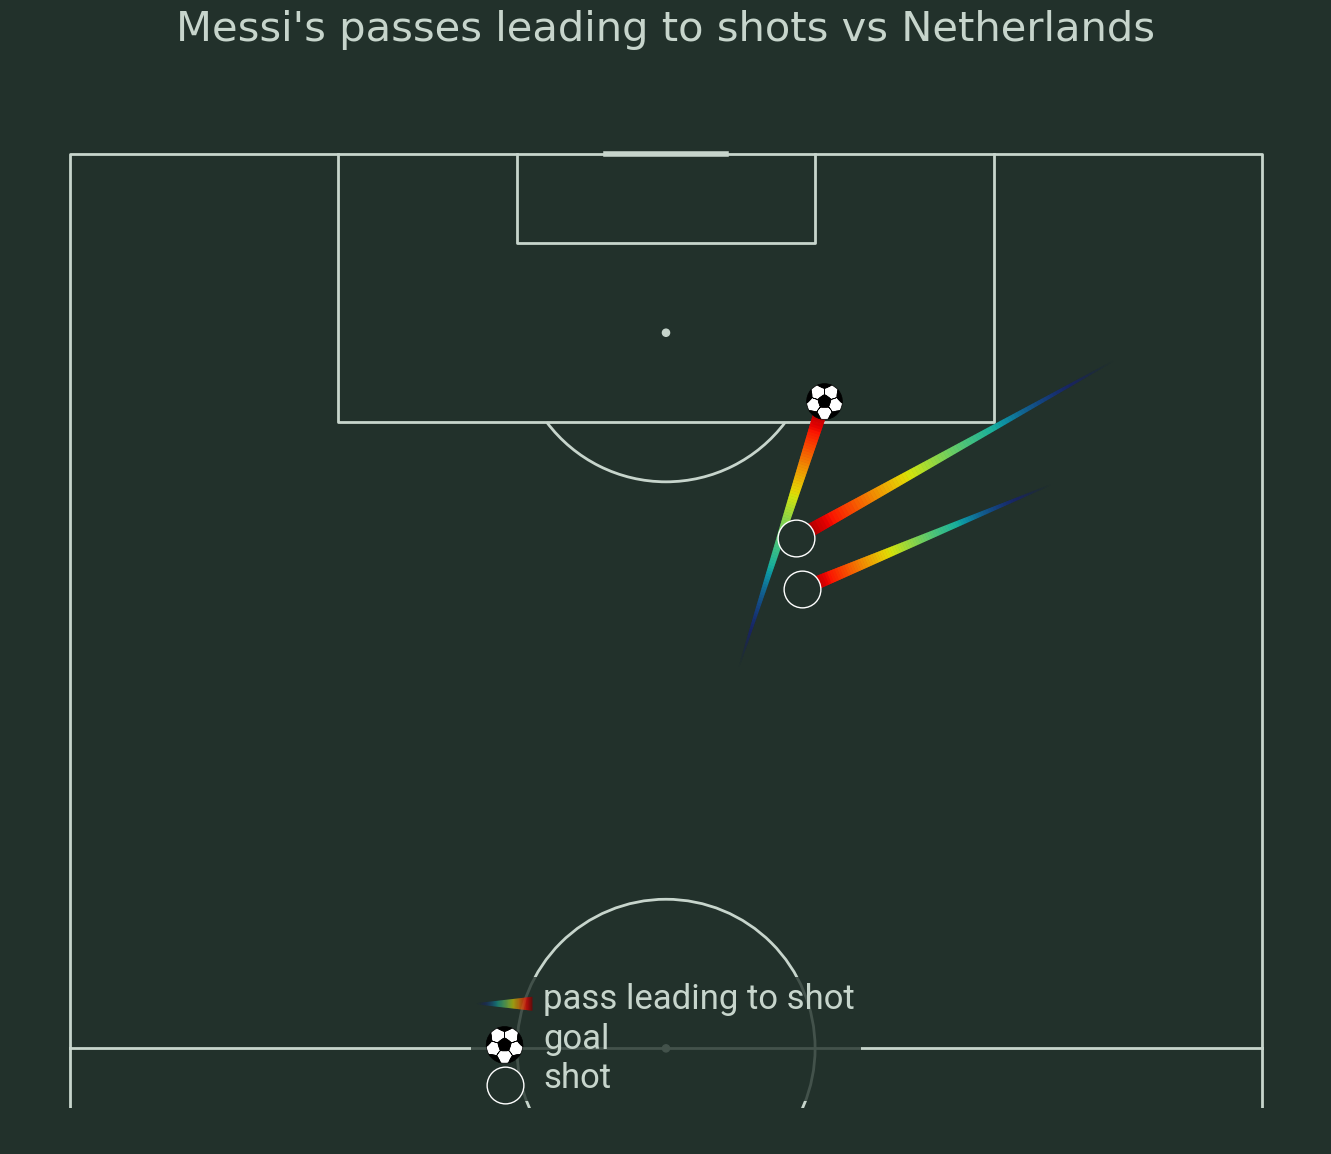

In [8]:
robotto_regular = FontManager()

# Setup the pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',
                      half=True, pad_top=2)
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=12,
                      title_height=0.08, title_space=0, axis=False,
                      grid_height=0.82)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.lines(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y,
            lw=10, transparent=True, comet=True, cmap='jet',
            label='pass leading to shot', ax=axs['pitch'])

# Plot the goals
pitch.scatter(df_pass[mask_goal].end_x, df_pass[mask_goal].end_y, s=700,
              marker='football', edgecolors='black', c='white', zorder=2,
              label='goal', ax=axs['pitch'])
pitch.scatter(df_pass[~mask_goal].end_x, df_pass[~mask_goal].end_y,
              edgecolors='white', c='#22312b', s=700, zorder=2,
              label='shot', ax=axs['pitch'])

# set legend
legend = axs['pitch'].legend(facecolor='#22312b', edgecolor='None',
                             loc='lower center', handlelength=4)
for text in legend.get_texts():
    text.set_fontproperties(robotto_regular.prop)
    text.set_fontsize(25)
    
fig.suptitle("Messi's passes leading to shots vs Netherlands", fontsize = 30)

plt.show()  # If you are using a Jupyter notebook you do not need this line

In [9]:
# Filtered events DataFrame
filtered_events = df_pass

# Display the filtered events in a table
display(filtered_events)

,x,y,end_x,end_y,id,body_part_name,outcome_name,shot_statsbomb_xg
0,85.6,44.9,103.4,50.6,50ab1047-1fc5-4e14-9a0a-e8eea1cb313e,Left Foot,Goal,0.434423
1,97.8,65.8,90.8,49.1,582f47fd-fb61-476c-b3e4-eadbd33999f9,Left Foot,Blocked,0.032086
2,106.1,70.0,94.2,48.7,294f8d32-b62f-4757-b865-37c236894951,Left Foot,Post,0.038940


# Link used for this visualization

In [ ]:
#https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_lines.html#sphx-glr-gallery-pitch-plots-plot-lines-py